## Understanding Dimensions of Different types of Instrument Protector Cards by looking at the Computer Vision Quality Control Device

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pyodbc as odbc
from pivottablejs import pivot_ui
import duckdb as db
import plotly.express as px

In [3]:
dframe = pd.read_csv('IPCardsData')

dframe['measurementtime'] = pd.to_datetime(dframe['measurementtime'])

In [5]:
dframe.shape

(4549171, 8)

In [3]:
dframe.count()

cardsize           3557756
measurementtime    3557756
area               3557756
loc_x              3557756
loc_y              3557756
region             3557756
height              375617
dtype: int64

### Card Size Medium Defect Locations Understanding

- With help of the Scatter plot and Histogram we can understand the overall dimensions of the card as captured by the computer vision system given as Location x and location y variables. We can then use that information to divide the card in 9 sections and define the dimension of each section. Any defect occuring outside that location will then can be termed as Misallignment issue.

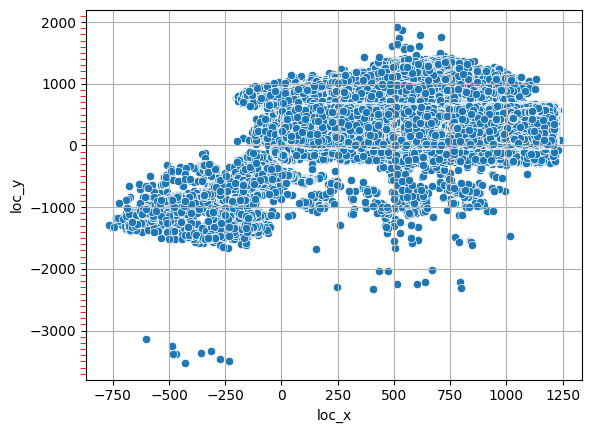

In [10]:
fig, ax = plt.subplots()
data_temp = dframe[dframe['cardsize'] == '1']
sns.scatterplot(data=data_temp, x="loc_x", y="loc_y")
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(axis='y', which='minor', length=4, color='r')
plt.grid()

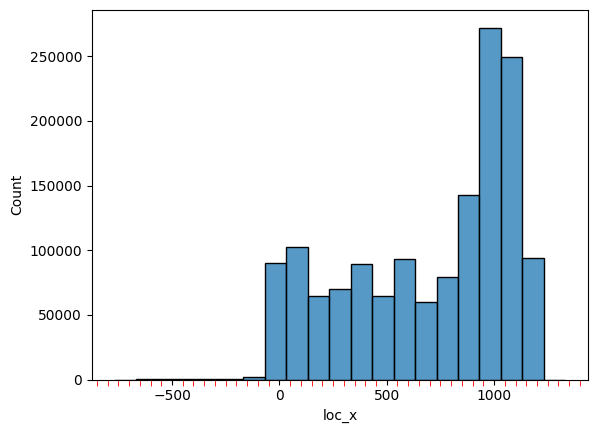

In [11]:
fig, ax = plt.subplots()
sns.histplot(data=data_temp, x="loc_x", binwidth = 100, ax=ax)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(axis='x', which='minor', length=4, color='r')

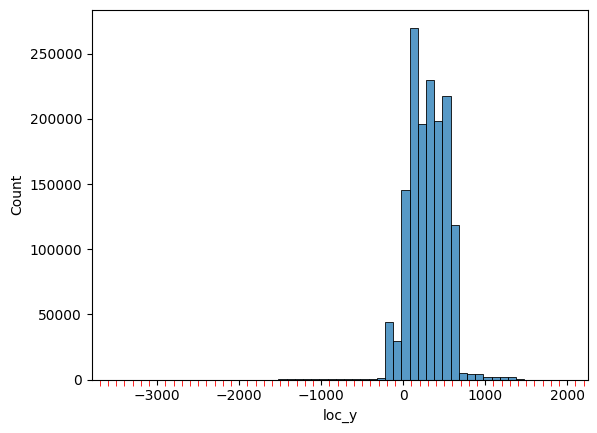

In [12]:
fig, ax = plt.subplots()
sns.histplot(data=data_temp, x="loc_y", binwidth = 100)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(axis='x', which='minor', length=4, color='r')

**For Card size 1: (min loc_x is -50 and max loc_x is 1250) and
                 (min loc_y is -200 and max loc_y is 750)**
                 
<br>
So for diving the error in 9 grids<br>
for x axis 1300/3 = 433.33. This gives us -50 to 383, 383 to 817, 817 to 1250 <br>
for y axis 950/3 = 316.66. This gives us -200 to 116, 116 to 434, 434 to 750


### Card Size Small Defect Locations Understanding

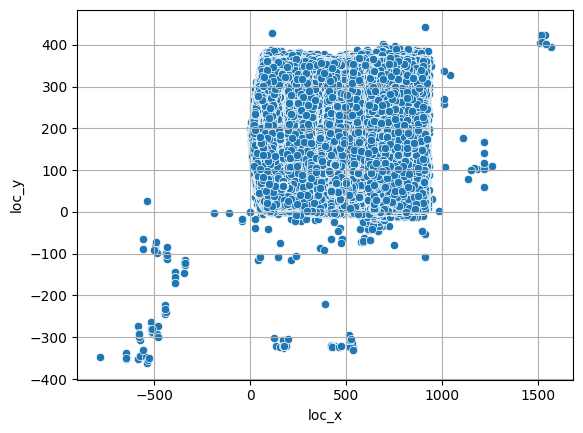

In [13]:
data_temp = dframe[dframe['cardsize'] == '2']
sns.scatterplot(data=data_temp, x="loc_x", y="loc_y")
plt.grid()

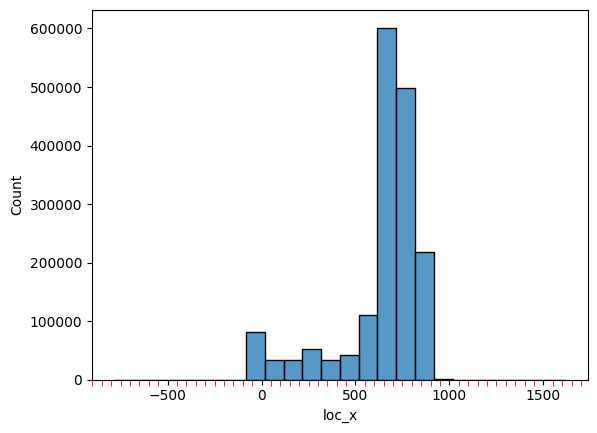

In [14]:
fig, ax = plt.subplots()
sns.histplot(data=data_temp, x="loc_x", binwidth = 100)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(axis='x', which='minor', length=4, color='r')

fig, ax = plt.subplots()
sns.histplot(data=data_temp, x="loc_y", binwidth = 100)
ax.xaxis.set_minor_locator(AutoMinorLocator(6))
ax.tick_params(axis='x', which='minor', length=4, color='r')

**For Card size 2: (min loc_x is -10 and max loc_x is 950) and
                 (min loc_y is -10 and max loc_y is 400)**
<br>
So for diving the error in 9 grids<br>
for x axis 960/3 = 320. This gives us -10 to 310, 310 to 630, 630 to 950 <br>
for y axis 410/3 = 136. This gives us -10 to 126, 126 to 263, 263 to 400